In [67]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from IPython.display import display
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

In [2]:
data = pd.read_excel('C://Users//PanL//OneDrive - Vituity//burnout//tableau.xlsx')
data = data[['employeeID','D_SITE','Name','D_TENURE_GROUP', 'D_GENDER', 'D_ETHNICITY', 'D_AGE', 
    'D_FLSA_STATUS_PARTNER_LEVEL','D_MANAGER_FLAG', 'D_WORK_STATE', 'D_POPULATION', 'D_JOB_TITLE',
    'num_sites','AncillaryLoss', 'DowncodeLoss', 'Cases','Hours ', 'Cases/Hour', 'Avg. Charges', 
    'Avg. Payments','Charges/Hour', 'E&M Acuity', 'Median TTP', 'Median TAT-A','Median TAT-D', 'VIT38']]

# Data Overview

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2892 entries, 0 to 2891
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   employeeID                   2892 non-null   int64  
 1   D_SITE                       2892 non-null   object 
 2   Name                         2885 non-null   object 
 3   D_TENURE_GROUP               2892 non-null   object 
 4   D_GENDER                     2892 non-null   object 
 5   D_ETHNICITY                  1859 non-null   object 
 6   D_AGE                        2892 non-null   int64  
 7   D_FLSA_STATUS_PARTNER_LEVEL  2892 non-null   object 
 8   D_MANAGER_FLAG               2892 non-null   object 
 9   D_WORK_STATE                 2892 non-null   object 
 10  D_POPULATION                 2892 non-null   object 
 11  D_JOB_TITLE                  2892 non-null   object 
 12  num_sites                    2177 non-null   float64
 13  AncillaryLoss     

In [6]:
vit38 = data['VIT38'].value_counts().reset_index().rename(columns={'index':'burnout_score', 'VIT38':'cnt'})
vit38['pct'] = vit38['cnt']/sum(vit38['cnt'])
vit38.sort_values(by='burnout_score')

burnout_score  cnt       pct
4            1.0  321  0.143048
1            2.0  441  0.196524
0            3.0  481  0.214349
2            4.0  433  0.192959
3            5.0  371  0.165330
5            6.0  160  0.071301
6            7.0   37  0.016488

In [9]:
tenure_38 = pd.crosstab(data.D_TENURE_GROUP, data.VIT38)
ax = sns.heatmap(tenure_38, annot=True, fmt="d")

In [10]:
data.groupby('VIT38')['Hours '].agg([('min', min),
                                ('25q', lambda x: x.quantile(0.25)),
                                ('median', np.median), 
                                ('75q', lambda x: x.quantile(0.75)),
                                ('max', max),
                                ('mean', np.mean)]).reset_index()

VIT38    min        25q   median        75q      max         mean
0    1.0  74.00  1268.2500  1880.00  2308.6875  4028.25  1772.473140
1    2.0  23.00  1448.3750  1911.50  2287.5000  3890.50  1802.228632
2    3.0  17.00  1397.6250  1903.00  2272.3750  4155.25  1801.672199
3    4.0  32.00  1196.5000  1750.50  2222.5000  3398.00  1659.946779
4    5.0  13.00  1299.9375  1815.25  2269.8750  4155.25  1734.651078
5    6.0  65.00  1255.5000  1797.50  2230.7500  3401.50  1721.576642
6    7.0  42.75   889.3750  1561.50  2046.8750  3296.00  1480.814516

In [15]:
data.dropna(subset=['VIT38'], inplace=True)
data['burnout'] = data['VIT38'].apply(lambda x: int(x>=5))
data['CA'] = data['D_WORK_STATE'].apply(lambda x: int(x=='CA'))
data.dropna(subset=['num_sites','AncillaryLoss', 'DowncodeLoss', 'Cases','Hours ', 'Cases/Hour', 'Avg. Charges', 
    'Avg. Payments','Charges/Hour', 'E&M Acuity', 'Median TTP', 'Median TAT-A','Median TAT-D'], inplace=True)
data.D_ETHNICITY.fillna('Not disclosed', inplace=True) #UNK
data.loc[data.D_ETHNICITY=='Not Disclosed','D_ETHNICITY'] = 'Not disclosed'

In [22]:
ctg_vals = ['D_GENDER', 'D_MANAGER_FLAG', 'CA','D_POPULATION','D_FLSA_STATUS_PARTNER_LEVEL','D_TENURE_GROUP','D_ETHNICITY','D_JOB_TITLE']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 24))
axe = axes.ravel()
for i in range(len(ctg_vals)):
    tmp = data.groupby(to_plot[i])['burnout'].apply(lambda x: x.value_counts(normalize=True)).unstack().fillna(0)
    tmp.plot(kind='bar', ax=axe[i])
plt.tight_layout()
plt.show()

C:\Users\PanL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PanL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PanL\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

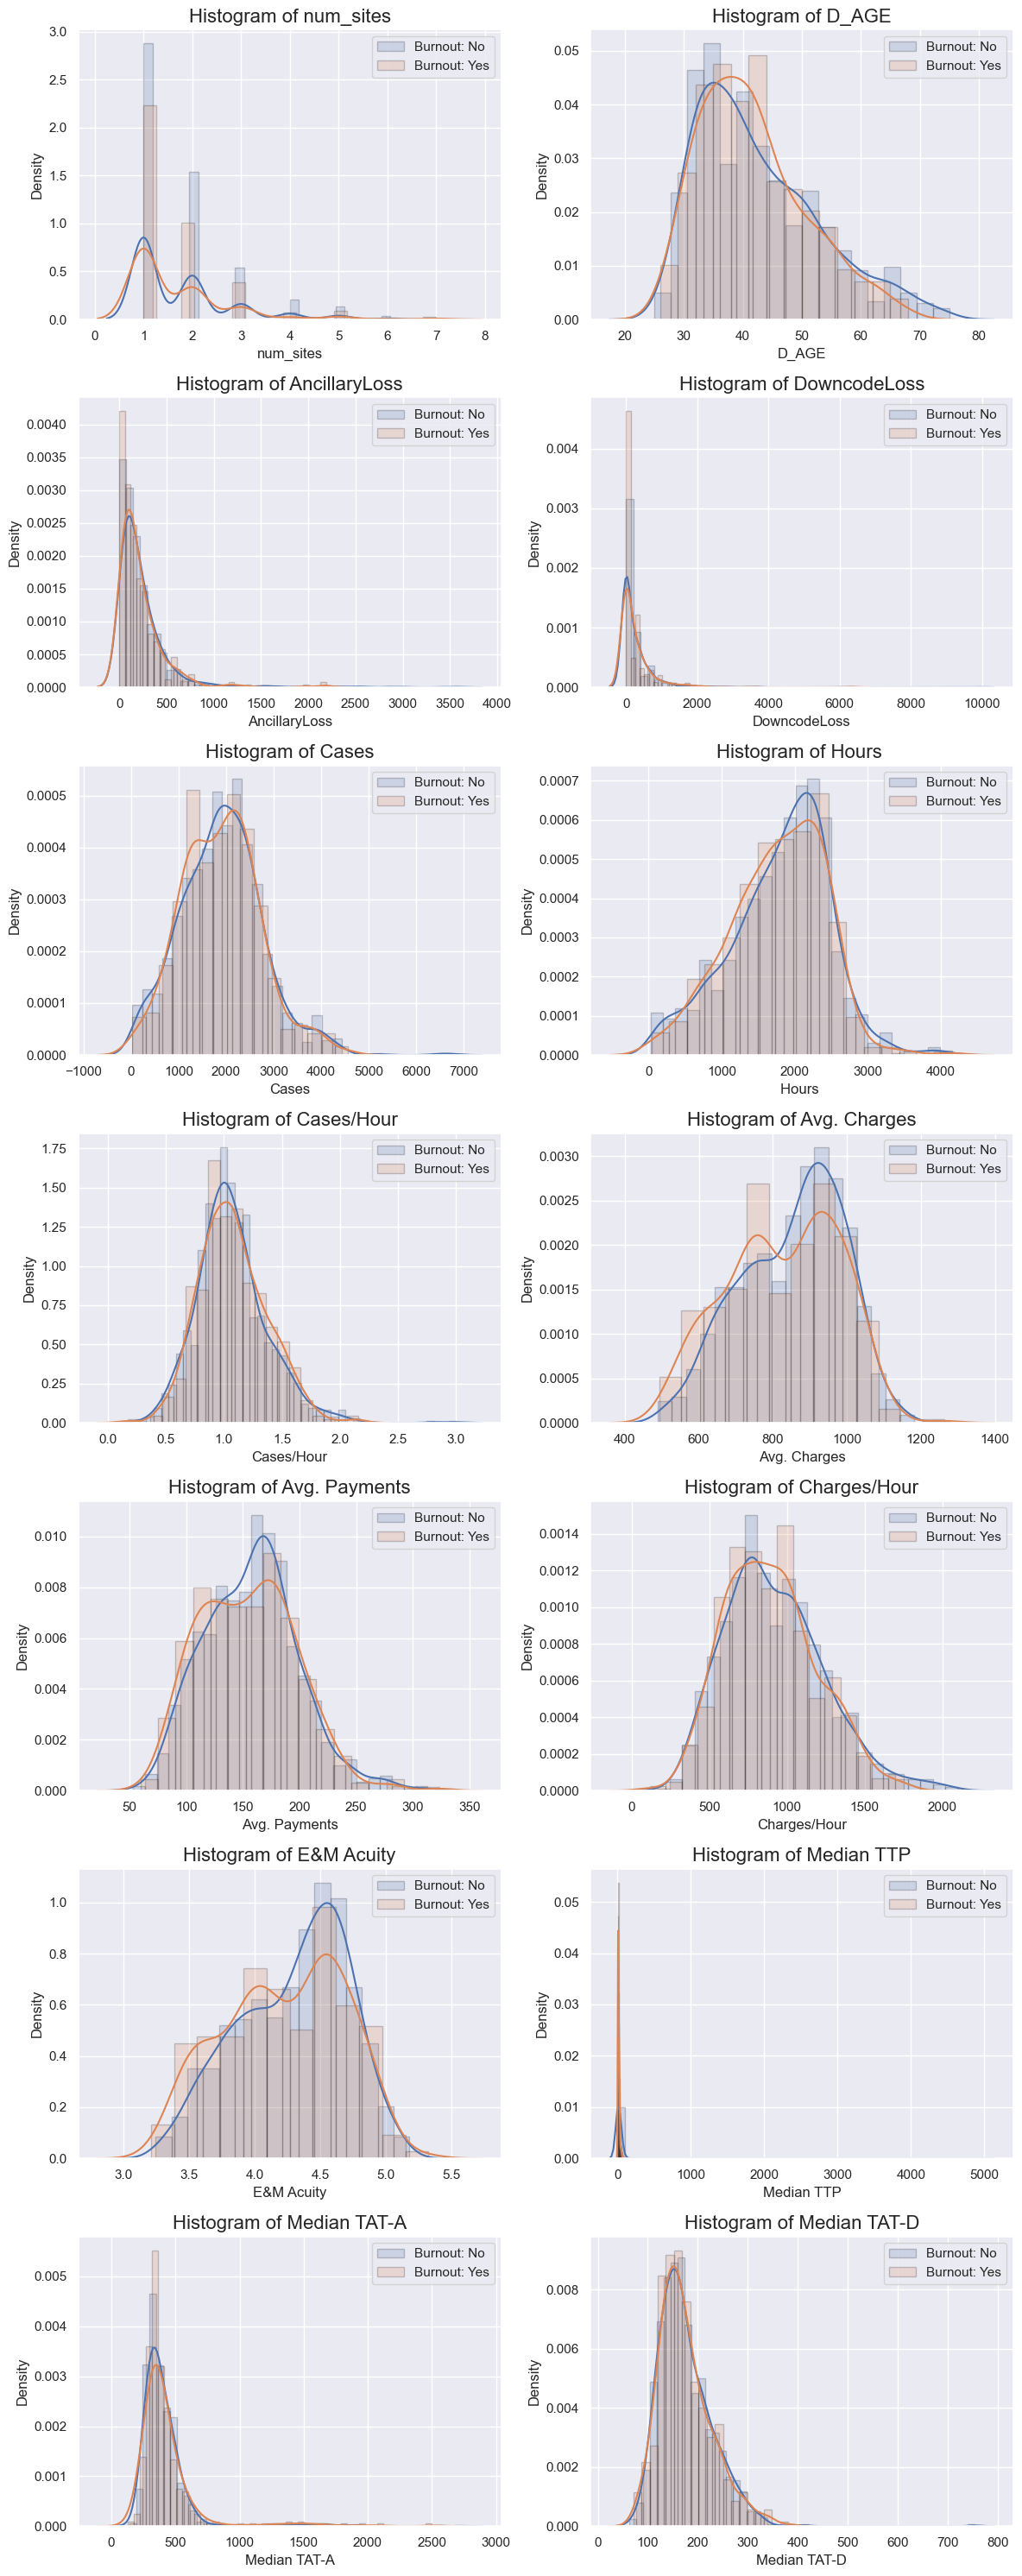

In [20]:
num_vals = ['num_sites','D_AGE','AncillaryLoss', 'DowncodeLoss', 'Cases','Hours ', 'Cases/Hour', 'Avg. Charges', 
    'Avg. Payments','Charges/Hour', 'E&M Acuity', 'Median TTP', 'Median TAT-A','Median TAT-D']
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 30))
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
axe = axes.ravel()
for i in range(len(num_vals)):
    sns.distplot(data[data['burnout'] == 0][num_vals[i]], label='Burnout: No', 
             ax=axe[i], hist_kws=hist_kws)
    sns.distplot(data[data['burnout'] == 1][num_vals[i]], label='Burnout: Yes', 
             ax=axe[i], hist_kws=hist_kws)
    axe[i].set_title('Histogram of {}'.format(num_vals[i]), fontsize=16)
    axe[i].legend()
plt.tight_layout()
plt.show()

# Feature Correlation

In [87]:
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr, chi2_contingency

## Pearson Correlation

In [23]:
pearsonr(data.VIT38, data['Cases/Hour'])

(-0.021901375469388626, 0.3816135400806174)

## Cramér's V

In [28]:
X = data.loc[:,ctg_vals]
y = LabelEncoder().fit_transform(data.burnout)
X = X.apply(LabelEncoder().fit_transform)

In [33]:
def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

In [34]:
rows = []
for var1 in X:
    col = []
    for var2 in X:
        cramers =cramers_V(X[var1], X[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = X.columns, index =X.columns);df

D_GENDER  D_MANAGER_FLAG    CA  D_POPULATION  \
D_GENDER                         1.00            0.01  0.00          0.10   
D_MANAGER_FLAG                   0.01            0.99  0.00          0.00   
CA                               0.00            0.00  1.00          0.00   
D_POPULATION                     0.10            0.00  0.00          1.00   
D_FLSA_STATUS_PARTNER_LEVEL      0.11            0.04  0.06          0.99   
D_TENURE_GROUP                   0.03            0.05  0.09          0.04   
D_ETHNICITY                      0.05            0.00  0.03          0.52   
D_JOB_TITLE                      0.14            0.78  0.04          1.00   

                             D_FLSA_STATUS_PARTNER_LEVEL  D_TENURE_GROUP  \
D_GENDER                                            0.11            0.03   
D_MANAGER_FLAG                                      0.04            0.05   
CA                                                  0.06            0.09   
D_POPULATION                                        0.99            0.04   
D_FLSA_STATUS_PARTNER_LEVEL                         1.00            0.24   
D_TENURE_GROUP                                      0.24            1.00   
D_ETHNICITY                                         0.08            0.01   
D_JOB_TITLE                                         0.18            0.04   

                             D_ETHNICITY  D_JOB_TITLE  
D_GENDER                            0.05         0.14  
D_MANAGER_FLAG                      0.00         0.78  
CA                                  0.03         0.04  
D_POPULATION                        0.52         1.00  
D_FLSA_STATUS_PARTNER_LEVEL         0.08         0.18  
D_TENURE_GROUP                      0.01         0.04  
D_ETHNICITY                         1.00         0.09  
D_JOB_TITLE                         0.09         1.00

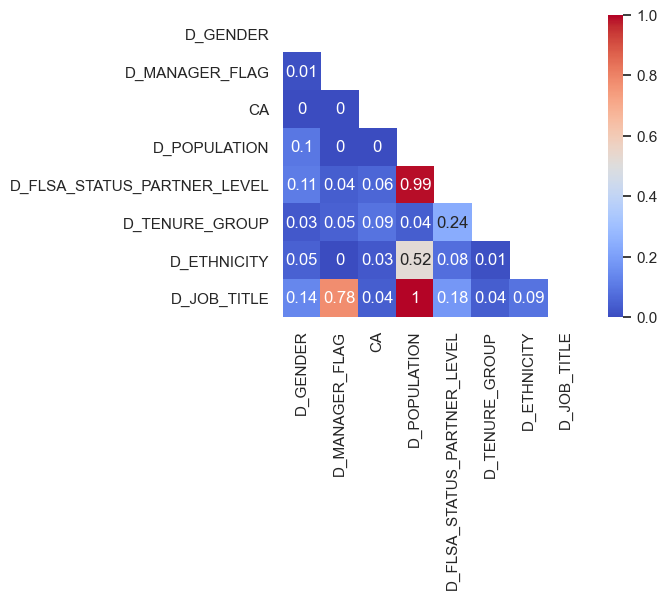

In [38]:
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1,square=True,annot=True,cmap="coolwarm")
plt.show()

In [42]:
chi2scores,pv = chi2(X,y)
fscores,_ = f_classif(X,y)
mi = mutual_info_classif(X,y)
feat_scores = pd.DataFrame({"chi2scores":chi2scores,'pvalue':pv,"fscores":fscores,"MI":mi},index=ctg_vals)
feat_scores.sort_values(by='chi2scores', ascending=False)

chi2scores    pvalue    fscores        MI
D_JOB_TITLE                   15.656525  0.000076   5.928212  0.000000
D_POPULATION                   6.161100  0.013059  15.131621  0.005155
D_FLSA_STATUS_PARTNER_LEVEL    4.811321  0.028273   4.450739  0.000000
D_ETHNICITY                    3.786694  0.051662   6.709864  0.000000
D_GENDER                       1.712583  0.190651   4.229205  0.000739
D_MANAGER_FLAG                 1.318313  0.250895   1.527224  0.000000
CA                             0.462709  0.496360   1.496309  0.008324
D_TENURE_GROUP                 0.008842  0.925084   0.016214  0.017966

## Correlation Matrix

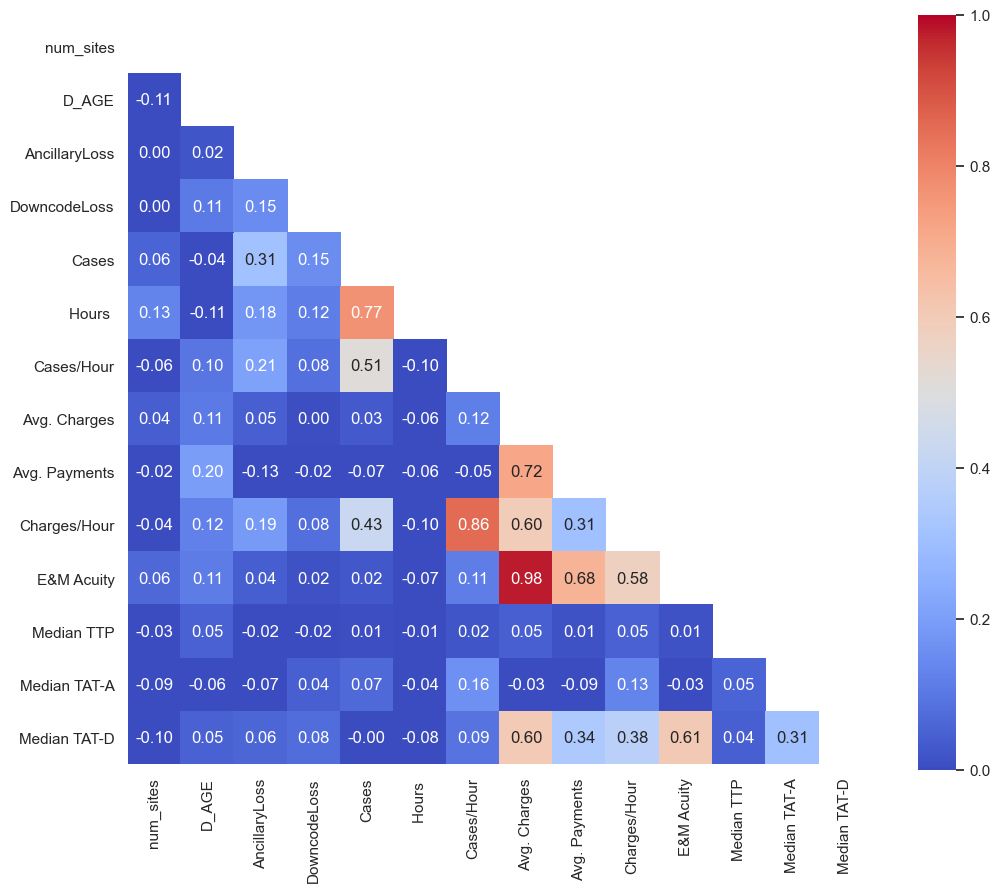

In [44]:
from sklearn import metrics
X = data.loc[:,num_vals]
plt.rcParams["figure.figsize"]=12,10
cor = X.corr()
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(cor, mask=mask,vmin=0., vmax=1, square=True,annot=True,fmt='.2f',cmap="coolwarm")
plt.show()

In [46]:
fscores,pv = f_classif(X,y)
mi = mutual_info_classif(X,y)
feat_num = pd.DataFrame({"fscores":fscores,'pvalue':pv,"MI":mi}, index=num_vals)
feat_num.sort_values(by='fscores', ascending=False)

fscores    pvalue        MI
Avg. Charges   11.112479  0.000877  0.009668
E&M Acuity      9.813251  0.001764  0.018371
D_AGE           3.210682  0.073348  0.000000
Charges/Hour    2.389862  0.122323  0.003473
Avg. Payments   1.879460  0.170588  0.000000
Median TAT-A    1.874112  0.171198  0.002531
num_sites       1.114368  0.291294  0.000000
Hours           0.969916  0.324850  0.000000
AncillaryLoss   0.806622  0.369256  0.000000
Median TTP      0.542132  0.461659  0.018983
Cases/Hour      0.237645  0.625979  0.009621
Cases           0.217061  0.641352  0.000000
Median TAT-D    0.096114  0.756584  0.010290
DowncodeLoss    0.009478  0.922458  0.000000

# Imbalanced Data Sampling

In [48]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

In [55]:
data = data[['burnout',
    'D_TENURE_GROUP', 'D_GENDER', 'D_ETHNICITY', 'D_AGE', 'D_MANAGER_FLAG', 'D_POPULATION', 'CA',
    'num_sites','AncillaryLoss', 'DowncodeLoss', 'Hours ', 'Cases/Hour',  'Avg. Payments',
    'E&M Acuity', 'Median TTP', 'Median TAT-A','Median TAT-D']] 
datatype = pd.DataFrame(data.dtypes)
data = pd.get_dummies(data, prefix_sep="_", columns=datatype[datatype[0]=='object'].index.to_list())
oversample = SMOTE()
labels  = np.array(data['burnout'])
features = data.loc[:,data.columns != 'burnout']
X, y = features, labels

### Undersampling

In [56]:
undersample = RandomUnderSampler(sampling_strategy='majority')
print(Counter(labels))
X, y = undersample.fit_resample(features, labels)
print(Counter(y))

Counter({0: 1171, 1: 427})
Counter({0: 427, 1: 427})


### Oversampling

In [57]:
X, y = oversample.fit_resample(features, labels)
print(Counter(y))

Counter({0: 1171, 1: 1171})


# Feature Selection

## RFE, RFECV

In [59]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from numpy import where

In [60]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
model = RandomForestClassifier(bootstrap = False, max_depth = 50, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 1000, random_state = 4)
#over = SMOTE(sampling_strategy='minority')
#pipeline = Pipeline(steps=[('over', over),('s',rfe),('m',model)])
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.784 (0.018)


In [61]:
rfe = RFECV(estimator=RandomForestClassifier())
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.783 (0.023)


In [62]:
rfe.fit(X, y)
feature_auto = pd.DataFrame({'feature':features.columns.values,'select':rfe.support_,'rank':rfe.ranking_})
feature_auto.sort_values(by='rank',ascending=True)

feature  select  rank
0                                               D_AGE    True     1
27                                  D_ETHNICITY_White    True     1
25                          D_ETHNICITY_Not disclosed    True     1
19                                      D_GENDER_Male    True     1
18                                    D_GENDER_Female    True     1
30                    D_POPULATION_Advanced Providers    True     1
11                                       Median TAT-D    True     1
10                                       Median TAT-A    True     1
9                                          Median TTP    True     1
31                              D_POPULATION_Partners    True     1
7                                       Avg. Payments    True     1
6                                          Cases/Hour    True     1
2                                           num_sites    True     1
8                                          E&M Acuity    True     1
3                                       AncillaryLoss    True     1
5                                              Hours     True     1
4                                        DowncodeLoss    True     1
16                           D_TENURE_GROUP_6-9 Years   False     2
15                           D_TENURE_GROUP_3-5 Years   False     3
13                           D_TENURE_GROUP_1-2 Years   False     4
14                           D_TENURE_GROUP_10+ Years   False     5
29                                 D_MANAGER_FLAG_Yes   False     6
17                    D_TENURE_GROUP_Less than 1 Year   False     7
1                                                  CA   False     8
28                                  D_MANAGER_FLAG_No   False     9
21                                  D_ETHNICITY_Asian   False    10
23               D_ETHNICITY_I am Hispanic or Latino.   False    11
22              D_ETHNICITY_Black or African American   False    12
26                      D_ETHNICITY_Two or more races   False    13
24  D_ETHNICITY_Native Hawaiian or other Pacific I...   False    14
12                                   D_TENURE_GROUP_1   False    15
20       D_ETHNICITY_American Indian or Alaska Native   False    16

## SelectFromModel

In [63]:
from sklearn.feature_selection import SelectFromModel

In [64]:
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)
rf = RandomForestClassifier(bootstrap = False, max_depth = 50, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 1000, random_state = 4)
rf.fit(train_features, train_labels)
sfm = SelectFromModel(rf).fit(train_features, train_labels)
feature_sfm = pd.DataFrame({'feature':features.columns.values,'select':sfm.get_support(),'score':sfm.estimator_.feature_importances_})
feature_sfm.sort_values(by='score',ascending=False)

feature  select     score
6                                          Cases/Hour    True  0.066664
8                                          E&M Acuity    True  0.066394
11                                       Median TAT-D    True  0.066285
5                                              Hours     True  0.065996
10                                       Median TAT-A    True  0.064158
7                                       Avg. Payments    True  0.062811
0                                               D_AGE    True  0.060613
3                                       AncillaryLoss    True  0.058546
9                                          Median TTP    True  0.058346
2                                           num_sites    True  0.050166
25                          D_ETHNICITY_Not disclosed    True  0.049688
27                                  D_ETHNICITY_White    True  0.038305
4                                        DowncodeLoss    True  0.034597
31                              D_POPULATION_Partners    True  0.033637
18                                    D_GENDER_Female   False  0.029454
19                                      D_GENDER_Male   False  0.029035
30                    D_POPULATION_Advanced Providers   False  0.027866
13                           D_TENURE_GROUP_1-2 Years   False  0.018724
15                           D_TENURE_GROUP_3-5 Years   False  0.017992
29                                 D_MANAGER_FLAG_Yes   False  0.016821
16                           D_TENURE_GROUP_6-9 Years   False  0.014452
14                           D_TENURE_GROUP_10+ Years   False  0.012402
1                                                  CA   False  0.011264
28                                  D_MANAGER_FLAG_No   False  0.010977
17                    D_TENURE_GROUP_Less than 1 Year   False  0.010358
21                                  D_ETHNICITY_Asian   False  0.009663
23               D_ETHNICITY_I am Hispanic or Latino.   False  0.008697
26                      D_ETHNICITY_Two or more races   False  0.003164
22              D_ETHNICITY_Black or African American   False  0.001849
24  D_ETHNICITY_Native Hawaiian or other Pacific I...   False  0.000617
12                                   D_TENURE_GROUP_1   False  0.000333
20       D_ETHNICITY_American Indian or Alaska Native   False  0.000127

# Modeling

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
grid = {'bootstrap': [True, False],
 'max_depth': [10, 30, 50, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 500, 1000, 2000]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=4, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [75]:
rf = RandomForestClassifier(bootstrap = False, max_depth = 50, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 1000, random_state = 4)
rf.fit(train_features, train_labels)
y_pred = rf.predict(test_features)
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))
metrics.confusion_matrix(test_labels, y_pred)

Accuracy: 0.8278805120910384


array([[320,  32],
       [ 89, 262]], dtype=int64)

## Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_features, train_labels)
y_pred = lr.predict(test_features)
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))
metrics.confusion_matrix(test_labels, y_pred)

Accuracy: 0.6870554765291608


C:\Users\PanL\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[252, 100],
       [120, 231]], dtype=int64)

## K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
grid = {'n_neighbors': list(range(2,10))}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=4, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC
model = SVC()
grid = {'kernel': ['linear','poly','rbf','C':[0.01, 0.1, 1],'gamma': [0.01, 0.1, 1]]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=4, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## Boosting - AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [76]:
model = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.789 (0.012)


## Boosting - xgboost

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()

grid = dict()
grid['eta'] = [0.05, 0.10, 0.20, 0.30 ]
grid['max_depth'] = [ 3, 5, 10, 15]
grid['min_child_weight'] = [1, 3, 5]
grid['gamma'] = [ 0.0, 0.2, 0.3 ]
grid['colsample_bytree'] = [ 0.3, 0.5, 0.7 ]

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=4, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [81]:
from xgboost import XGBClassifier
XGBC = XGBClassifier(colsample_bytree=0.5, eta=0.05, gamma=0.0, max_depth=15, min_child_weight=1)
n_scores = cross_val_score(XGBC, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
XGBC.fit(X, y)

Accuracy: 0.813 (0.009)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.05, gamma=0.0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.0500000007, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Model Interpretation

In [79]:
from sklearn.inspection import plot_partial_dependence

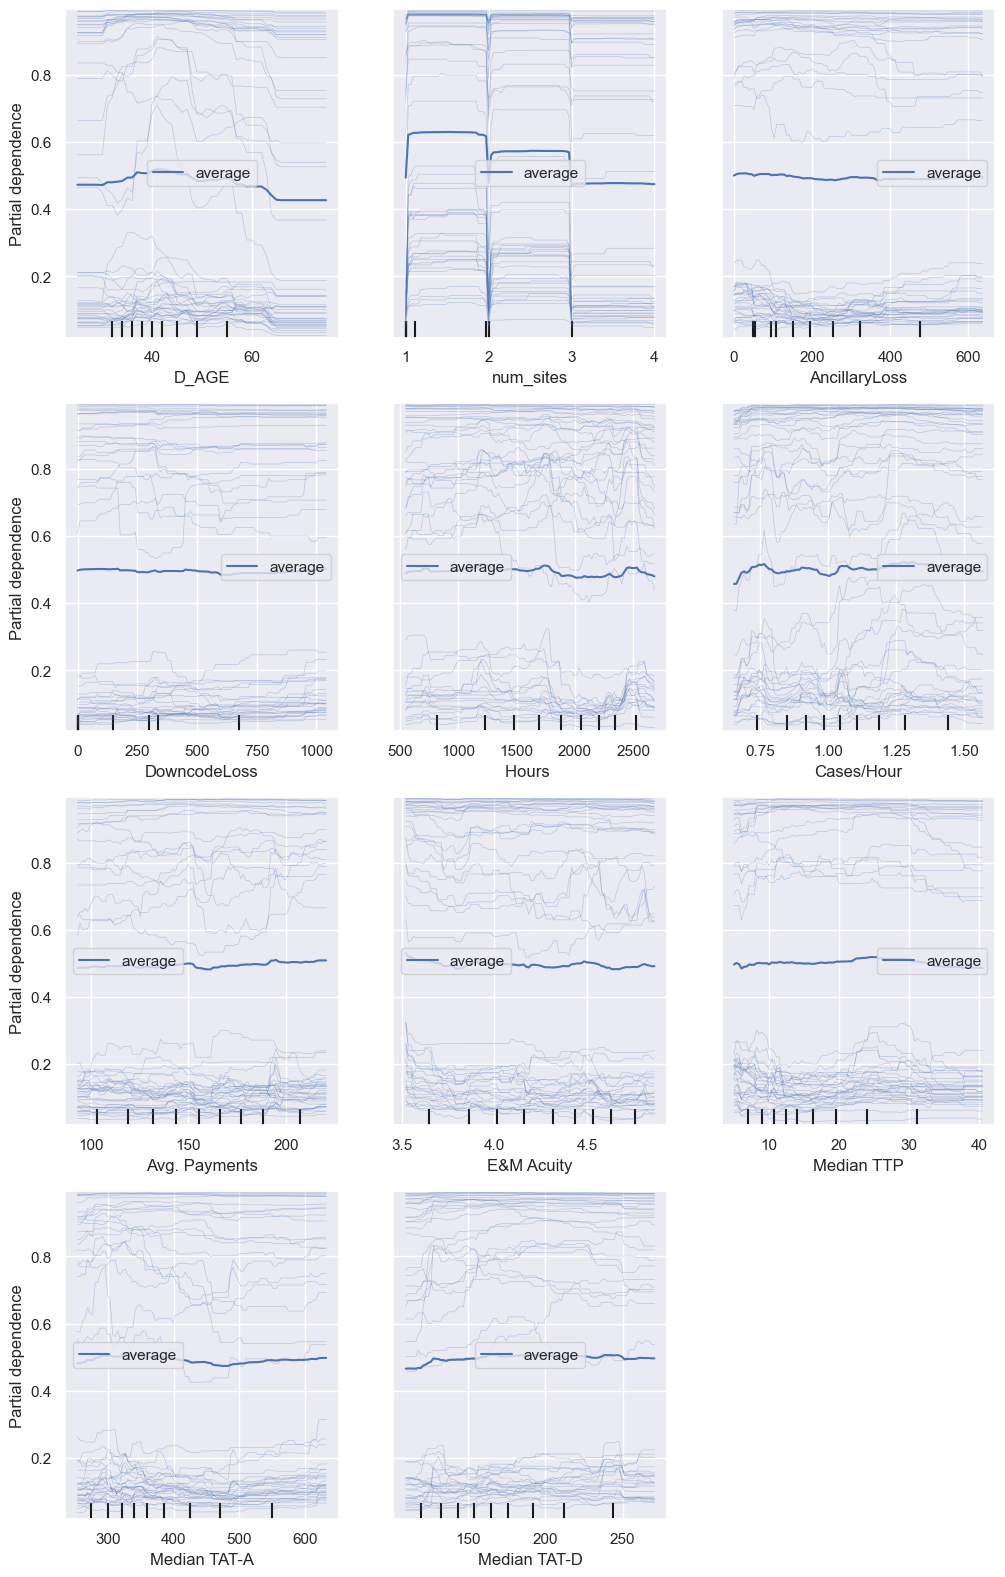

In [82]:
plt.rcParams["figure.figsize"]=12,20
subfeatures = ['D_AGE', 'num_sites', 
       'AncillaryLoss', 'DowncodeLoss', 'Hours ', 'Cases/Hour','Avg. Payments', 'E&M Acuity',
       'Median TTP', 'Median TAT-A', 'Median TAT-D']
plot_partial_dependence(XGBC, X, subfeatures, kind='both',subsample=50) 

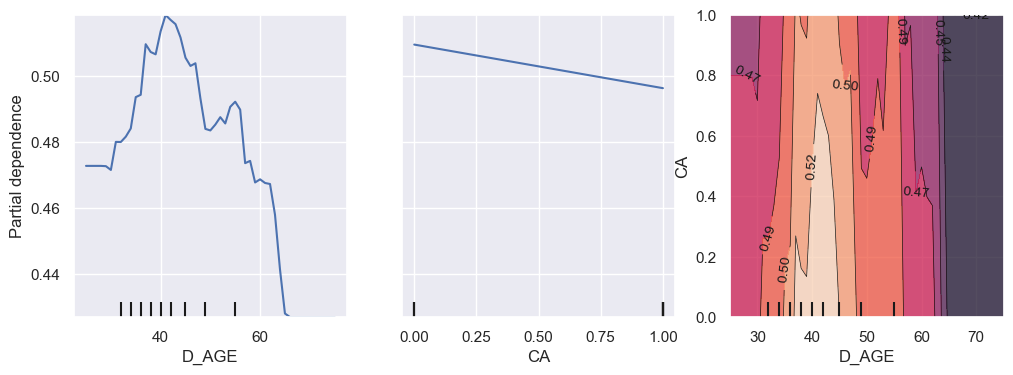

In [86]:
plt.rcParams["figure.figsize"]=12,4
subfeatures = [0, 1, (0, 1)]
plot_partial_dependence(XGBC, X, subfeatures) 

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(train_features, train_labels)
y_pred = clf.predict(test_features)
print("Accuracy:", metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.6870554765291608


In [99]:
text_representation = tree.export_text(clf, feature_names=list(features.columns.values))
print(text_representation)

|--- D_ETHNICITY_Not disclosed <= 0.50
|   |--- D_ETHNICITY_White <= 0.50
|   |   |--- D_ETHNICITY_Asian <= 0.50
|   |   |   |--- class: 1
|   |   |--- D_ETHNICITY_Asian >  0.50
|   |   |   |--- class: 0
|   |--- D_ETHNICITY_White >  0.50
|   |   |--- Hours  <= 2604.50
|   |   |   |--- class: 0
|   |   |--- Hours  >  2604.50
|   |   |   |--- class: 0
|--- D_ETHNICITY_Not disclosed >  0.50
|   |--- D_AGE <= 62.50
|   |   |--- D_TENURE_GROUP_1-2 Years <= 0.50
|   |   |   |--- class: 0
|   |   |--- D_TENURE_GROUP_1-2 Years >  0.50
|   |   |   |--- class: 0
|   |--- D_AGE >  62.50
|   |   |--- Cases/Hour <= 0.84
|   |   |   |--- class: 0
|   |   |--- Cases/Hour >  0.84
|   |   |   |--- class: 0



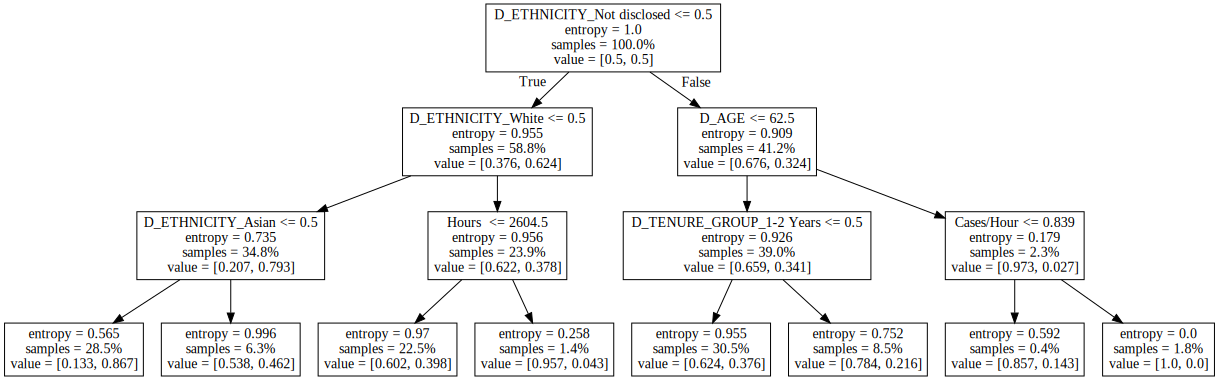

In [100]:
import graphviz
#import os
#os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = tree.export_graphviz(clf,feature_names=list(features.columns.values),proportion=True,leaves_parallel=True)
graph = graphviz.Source(dot_data, format="png") 
graph

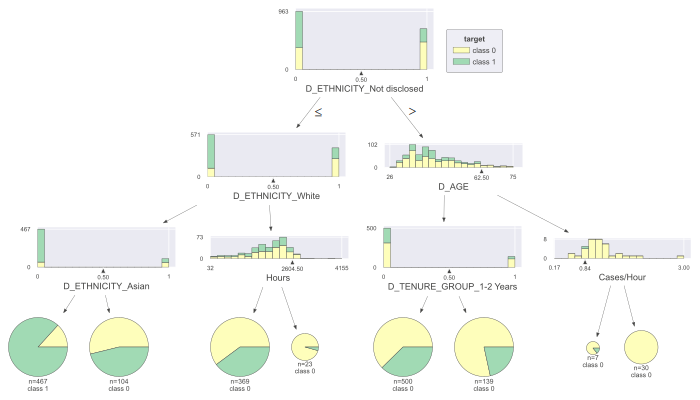

In [101]:
from dtreeviz.trees import dtreeviz # remember to load the package
viz = dtreeviz(clf, train_features, train_labels,
                target_name="target",
                feature_names=list(features.columns.values))
viz.save("decision_tree.svg")
viz

- https://cran.r-project.org/web/packages/datarobot/vignettes/PartialDependence.html